In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = 100

import warnings
warnings.filterwarnings('ignore')

## Data Understanding

In [4]:
# Reading the dataset

raw_df = pd.read_csv('train.csv')
raw_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
# Getting the info of dataset
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Describing the data
raw_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [5]:
# Getting the column ids which are considered as int64 but are actually categorical
categorical_cols = ['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF',
                    'LowQualFinSF', 'BsmtHalfBath' , 'BsmtFullBath', 
                    'FullBath', 'HalfBath' ,'BedroomAbvGr', 
                    'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                    'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold','YearBuilt', 'YearRemodAdd']

In [6]:
raw_df[categorical_cols] = raw_df[categorical_cols].astype('object')

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [8]:
# Checking for null values
null_count = pd.DataFrame(raw_df.isnull().sum(), columns= ['count'])
null_percent = pd.DataFrame( round(100*(raw_df.isnull().sum()/len(raw_df.index)), 2), columns = ['percent'])
null_df = pd.merge(right = null_count, left = null_percent, how='left',left_on=null_count.index, right_on=null_percent.index , left_index=False, right_index=False)
null_df.rename(columns = {'key_0': 'Column_name'}, inplace=True)
null_df

Column_name  percent  count
0              Id     0.00      0
1      MSSubClass     0.00      0
2        MSZoning     0.00      0
3     LotFrontage    17.74    259
4         LotArea     0.00      0
5          Street     0.00      0
6           Alley    93.77   1369
7        LotShape     0.00      0
8     LandContour     0.00      0
9       Utilities     0.00      0
10      LotConfig     0.00      0
11      LandSlope     0.00      0
12   Neighborhood     0.00      0
13     Condition1     0.00      0
14     Condition2     0.00      0
15       BldgType     0.00      0
16     HouseStyle     0.00      0
17    OverallQual     0.00      0
18    OverallCond     0.00      0
19      YearBuilt     0.00      0
20   YearRemodAdd     0.00      0
21      RoofStyle     0.00      0
22       RoofMatl     0.00      0
23    Exterior1st     0.00      0
24    Exterior2nd     0.00      0
25     MasVnrType     0.55      8
26     MasVnrArea     0.55      8
27      ExterQual     0.00      0
28      ExterCond     0.00      0
29     Foundation     0.00      0
30       BsmtQual     2.53     37
31       BsmtCond     2.53     37
32   BsmtExposure     2.60     38
33   BsmtFinType1     2.53     37
34     BsmtFinSF1     0.00      0
35   BsmtFinType2     2.60     38
36     BsmtFinSF2     0.00      0
37      BsmtUnfSF     0.00      0
38    TotalBsmtSF     0.00      0
39        Heating     0.00      0
40      HeatingQC     0.00      0
41     CentralAir     0.00      0
42     Electrical     0.07      1
43       1stFlrSF     0.00      0
44       2ndFlrSF     0.00      0
45   LowQualFinSF     0.00      0
46      GrLivArea     0.00      0
47   BsmtFullBath     0.00      0
48   BsmtHalfBath     0.00      0
49       FullBath     0.00      0
50       HalfBath     0.00      0
51   BedroomAbvGr     0.00      0
52   KitchenAbvGr     0.00      0
53    KitchenQual     0.00      0
54   TotRmsAbvGrd     0.00      0
55     Functional     0.00      0
56     Fireplaces     0.00      0
57    FireplaceQu    47.26    690
58     GarageType     5.55     81
59    GarageYrBlt     5.55     81
60   GarageFinish     5.55     81
61     GarageCars     0.00      0
62     GarageArea     0.00      0
63     GarageQual     5.55     81
64     GarageCond     5.55     81
65     PavedDrive     0.00      0
66     WoodDeckSF     0.00      0
67    OpenPorchSF     0.00      0
68  EnclosedPorch     0.00      0
69      3SsnPorch     0.00      0
70    ScreenPorch     0.00      0
71       PoolArea     0.00      0
72         PoolQC    99.52   1453
73          Fence    80.75   1179
74    MiscFeature    96.30   1406
75        MiscVal     0.00      0
76         MoSold     0.00      0
77         YrSold     0.00      0
78       SaleType     0.00      0
79  SaleCondition     0.00      0
80      SalePrice     0.00      0

## Handling Null Values

In [9]:
# Handling null values in Alley
raw_df.Alley.fillna('No Alley', inplace = True)

In [10]:
raw_df.BsmtQual.fillna('NA', inplace=True)

In [11]:
raw_df.BsmtCond.fillna('NA', inplace=True)
raw_df.BsmtFinType2.fillna('NA', inplace=True)
raw_df.BsmtFinType1.fillna('NA', inplace=True)
raw_df.BsmtExposure.fillna('NA', inplace=True)

In [12]:
raw_df.FireplaceQu.fillna('NA', inplace = True)

In [13]:
raw_df['GarageType'].fillna('No Garage', inplace=True) 
raw_df['GarageFinish'].fillna('No Garage', inplace=True) 
raw_df['GarageQual'].fillna('No Garage', inplace=True) 
raw_df['GarageCond'].fillna('No Garage', inplace=True) 

In [14]:
raw_df.LotFrontage.fillna(0, inplace = True)
raw_df.MasVnrType.fillna('None', inplace = True)
raw_df.MasVnrArea.fillna(0, inplace = True)

In [15]:
raw_df.Fence.fillna('NA', inplace = True)

In [16]:
## Since PoolQC and MiscFeature has more than 96% of null values, dropping these columns

raw_df.drop(['PoolQC', 'MiscFeature'], axis = 1, inplace = True)

In [17]:
raw_df.GarageYrBlt.isnull().sum()

81

In [18]:
# Checking for null values
null_count = pd.DataFrame(raw_df.isnull().sum(), columns= ['count'])
null_percent = pd.DataFrame( round(100*(raw_df.isnull().sum()/len(raw_df.index)), 2), columns = ['percent'])
null_df = pd.merge(right = null_count, left = null_percent, how='left',left_on=null_count.index, right_on=null_percent.index , left_index=False, right_index=False)
null_df.rename(columns = {'key_0': 'Column_name'}, inplace=True)
null_df

Column_name  percent  count
0              Id     0.00      0
1      MSSubClass     0.00      0
2        MSZoning     0.00      0
3     LotFrontage     0.00      0
4         LotArea     0.00      0
5          Street     0.00      0
6           Alley     0.00      0
7        LotShape     0.00      0
8     LandContour     0.00      0
9       Utilities     0.00      0
10      LotConfig     0.00      0
11      LandSlope     0.00      0
12   Neighborhood     0.00      0
13     Condition1     0.00      0
14     Condition2     0.00      0
15       BldgType     0.00      0
16     HouseStyle     0.00      0
17    OverallQual     0.00      0
18    OverallCond     0.00      0
19      YearBuilt     0.00      0
20   YearRemodAdd     0.00      0
21      RoofStyle     0.00      0
22       RoofMatl     0.00      0
23    Exterior1st     0.00      0
24    Exterior2nd     0.00      0
25     MasVnrType     0.00      0
26     MasVnrArea     0.00      0
27      ExterQual     0.00      0
28      ExterCond     0.00      0
29     Foundation     0.00      0
30       BsmtQual     0.00      0
31       BsmtCond     0.00      0
32   BsmtExposure     0.00      0
33   BsmtFinType1     0.00      0
34     BsmtFinSF1     0.00      0
35   BsmtFinType2     0.00      0
36     BsmtFinSF2     0.00      0
37      BsmtUnfSF     0.00      0
38    TotalBsmtSF     0.00      0
39        Heating     0.00      0
40      HeatingQC     0.00      0
41     CentralAir     0.00      0
42     Electrical     0.07      1
43       1stFlrSF     0.00      0
44       2ndFlrSF     0.00      0
45   LowQualFinSF     0.00      0
46      GrLivArea     0.00      0
47   BsmtFullBath     0.00      0
48   BsmtHalfBath     0.00      0
49       FullBath     0.00      0
50       HalfBath     0.00      0
51   BedroomAbvGr     0.00      0
52   KitchenAbvGr     0.00      0
53    KitchenQual     0.00      0
54   TotRmsAbvGrd     0.00      0
55     Functional     0.00      0
56     Fireplaces     0.00      0
57    FireplaceQu     0.00      0
58     GarageType     0.00      0
59    GarageYrBlt     5.55     81
60   GarageFinish     0.00      0
61     GarageCars     0.00      0
62     GarageArea     0.00      0
63     GarageQual     0.00      0
64     GarageCond     0.00      0
65     PavedDrive     0.00      0
66     WoodDeckSF     0.00      0
67    OpenPorchSF     0.00      0
68  EnclosedPorch     0.00      0
69      3SsnPorch     0.00      0
70    ScreenPorch     0.00      0
71       PoolArea     0.00      0
72          Fence     0.00      0
73        MiscVal     0.00      0
74         MoSold     0.00      0
75         YrSold     0.00      0
76       SaleType     0.00      0
77  SaleCondition     0.00      0
78      SalePrice     0.00      0

In [19]:
#converting year to number of years
raw_df['YearBuilt'] = 2021 - raw_df['YearBuilt']
raw_df['YearRemodAdd'] = 2021 - raw_df['YearRemodAdd']
raw_df['GarageYrBlt'] = 2021 - raw_df['GarageYrBlt']
raw_df['YrSold'] = 2021 - raw_df['YrSold']

## Outlier Treatment

In [20]:
numeric_cols = raw_df.select_dtypes(['int64','float64'])
numeric_cols.head()

Id  LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0   1         65.0     8450       196.0         706           0        150   
1   2         80.0     9600         0.0         978           0        284   
2   3         68.0    11250       162.0         486           0        434   
3   4         60.0     9550         0.0         216           0        540   
4   5         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0          856       856       854       1710         548           0   
1         1262      1262         0       1262         460         298   
2          920       920       866       1786         608           0   
3          756       961       756       1717         642           0   
4         1145      1145      1053       2198         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [21]:
numeric_cols.describe([.25,.5,.75,.9,.95,.99])

Id  LotFrontage        LotArea   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    57.623288   10516.828082   103.117123   443.639726   
std     421.610009    34.664304    9981.264932   180.731373   456.098091   
min       1.000000     0.000000    1300.000000     0.000000     0.000000   
25%     365.750000    42.000000    7553.500000     0.000000     0.000000   
50%     730.500000    63.000000    9478.500000     0.000000   383.500000   
75%    1095.250000    79.000000   11601.500000   164.250000   712.250000   
90%    1314.100000    92.000000   14381.700000   335.000000  1065.500000   
95%    1387.050000   104.000000   17401.150000   456.000000  1274.000000   
99%    1445.410000   137.410000   37567.640000   791.280000  1572.410000   
max    1460.000000   313.000000  215245.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
90%     117.200000  1232.000000  1602.200000  1680.000000   954.200000   
95%     396.200000  1468.000000  1753.000000  1831.250000  1141.050000   
99%     830.380000  1797.050000  2155.050000  2219.460000  1418.920000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

         GrLivArea   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean   1515.463699   472.980137    94.244521    46.660274      21.954110   
std     525.480383   213.804841   125.338794    66.256028      61.119149   
min     334.000000     0.000000     0.000000     0.000000       0.000000   
25%    1129.500000   334.500000     0.000000     0.000000       0.000000   
50%    1464.000000   480.000000     0.000000    25.000000       0.000000   
75%    1776.750000   576.000000   168.000000    68.000000       0.000000   
90%    2158.300000   757.100000   262.000000   130.000000     112.000000   
95%    2466.100000   850.100000   335.000000   175.050000     180.150000   
99%    3123.480000  1002.790000   505.460000   285.820000     261.050000   
max    5642.000000  1418.000000   857.000000   547.000000     552.000000   

         3SsnPorch  ScreenPorch     PoolArea       MiscVal      SalePrice  
count  1460.000000  1460.000000  1460.000000   1460.000000    1460.000000  
mean      3.409589    15.060959     2.758904     43.489041  180921.195890  
std      29.317331    55.757415    40.177307    496.123024   79442.502883  
min       0.000000     0.000000     0.000000      0.000000   34900.000000  
25%       0.000000     0.000000     0.000000      0.000000  129975.000000  
50%       0.000000     0.000000     0.000000      0.000000  163000.000000  
75%       0.000000     0.000000     0.000000      0.000000  214000.000000  
90%       0.000000     0.000000     0.000000      0.000000  278000.000000  
95%       0.000000   160.000000     0.000000      0.000000  326100.000000  
99%     168.000000   268.050000     0.000000    700.000000  442567.010000  
max     508.000000   480.000000   738.000000  15500.000000  755000.000000

In [22]:
def plot_box_plot(feature):
    plt.figure(figsize = (15,4))
    sns.boxplot(data= raw_df,x=feature)
    return plt

In [23]:
# Function to select values from upper to lower quantile limits
def select_range(feature, data = raw_df, upper_quantile = 0.99, lower_quantile = 0.1):
    lower_limit = np.quantile(raw_df[feature], lower_quantile)
    upper_limit = np.quantile(raw_df[feature], upper_quantile)
    raw_df = raw_df[(raw_df[feature] <= upper_limit) & (raw_df[feature] >= lower_limit)]

#### Lot Area

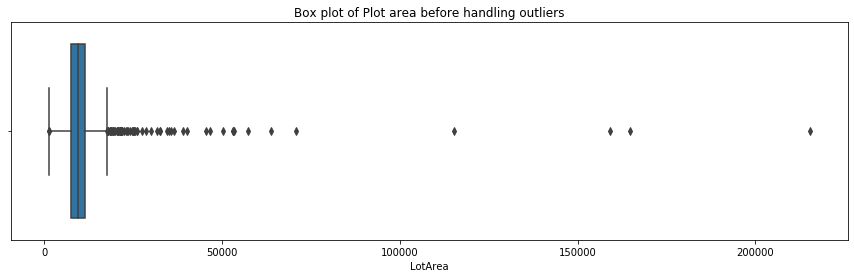

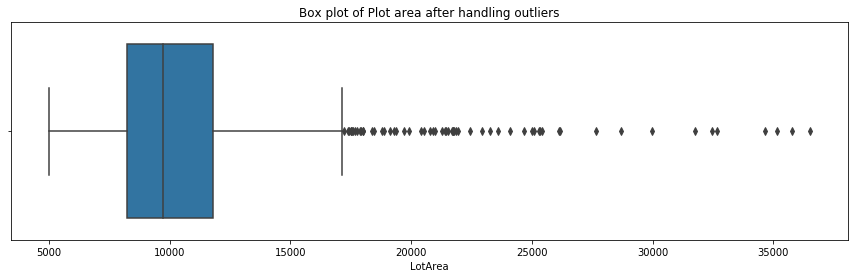

In [24]:
# Outlier analysis of Lot Area

plt1 = plot_box_plot('LotArea')
plt1.title('Box plot of Plot area before handling outliers')
plt1.show()

# Selecting values from 0.1 to 0.99 quantile range

feature = 'LotArea'
lower_limit = np.quantile(raw_df[feature], 0.1)
upper_limit = np.quantile(raw_df[feature], 0.99)
raw_df = raw_df[(raw_df[feature] <= upper_limit) & (raw_df[feature] >= lower_limit)]

# Plot after handling outliers

plt1 = plot_box_plot('LotArea')
plt1.title('Box plot of Plot area after handling outliers')
plt1.show()


### Lot Frontage

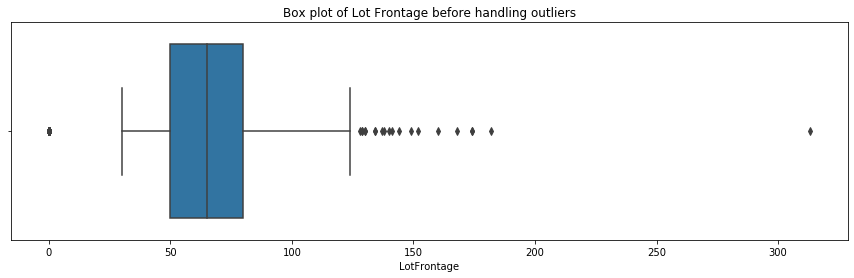

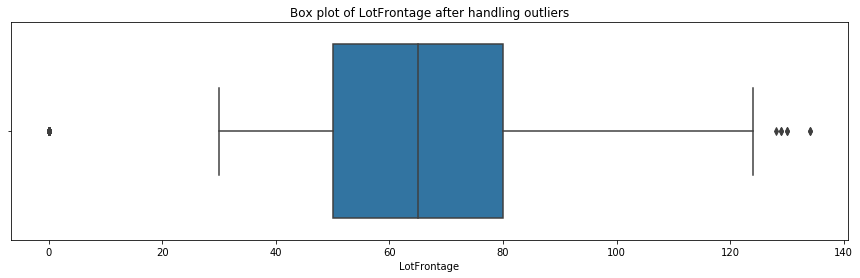

In [25]:
# Outlier analysis of Lot Area

plt1 = plot_box_plot('LotFrontage')
plt1.title('Box plot of Lot Frontage before handling outliers')
plt1.show()

# Selecting values from 0.1 to 0.99 quantile range


feature = 'LotFrontage'
lower_limit = np.quantile(raw_df[feature], 0.01)
upper_limit = np.quantile(raw_df[feature], 0.99)
raw_df = raw_df[(raw_df[feature] <= upper_limit) & (raw_df[feature] >= lower_limit)]

# Plot after handling outliers

plt1 = plot_box_plot('LotFrontage')
plt1.title('Box plot of LotFrontage after handling outliers')
plt1.show()

#### MasVnrArea

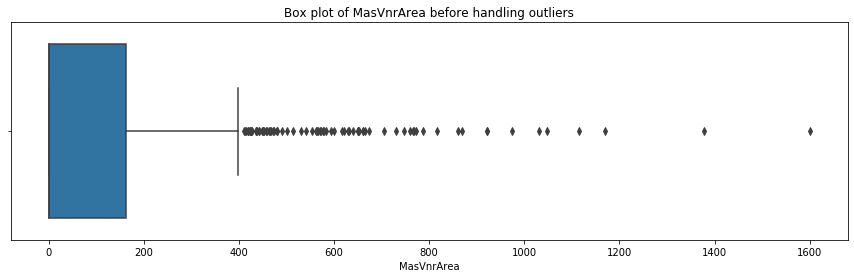

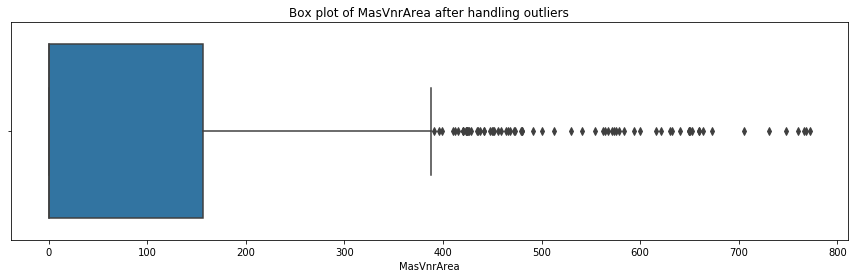

In [26]:
# Outlier analysis of MasVnrArea

plt1 = plot_box_plot('MasVnrArea')
plt1.title('Box plot of MasVnrArea before handling outliers')
plt1.show()


# Selecting values from 0.1 to 0.99 quantile range


feature = 'MasVnrArea'
lower_limit = np.quantile(raw_df[feature], 0.01)
upper_limit = np.quantile(raw_df[feature], 0.99)
raw_df = raw_df[(raw_df[feature] <= upper_limit) & (raw_df[feature] >= lower_limit)]

# Plot after handling outliers

plt1 = plot_box_plot('MasVnrArea')
plt1.title('Box plot of MasVnrArea after handling outliers')
plt1.show()


#### BsmtFinSF1

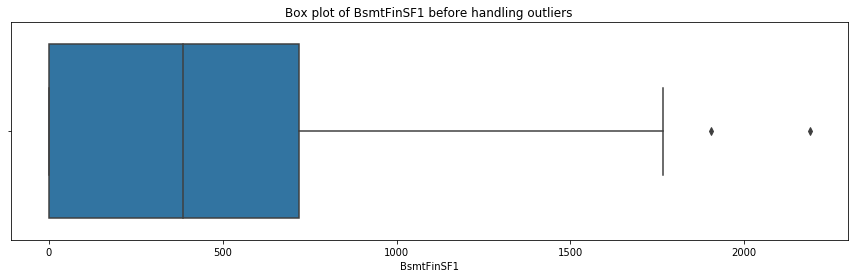

In [27]:
# Outlier analysis of BsmtFinSF1

plt1 = plot_box_plot('BsmtFinSF1')
plt1.title('Box plot of BsmtFinSF1 before handling outliers')
plt1.show()


#### BsmtFinSF2

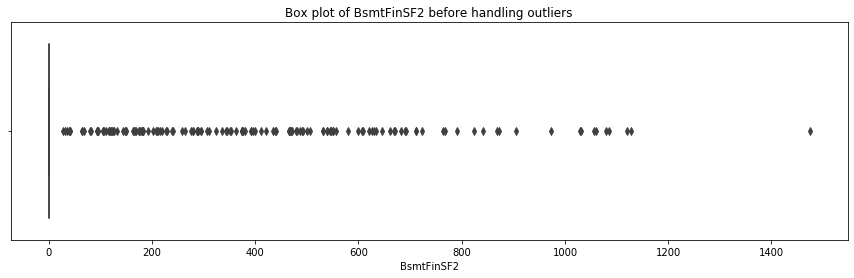

In [28]:
# Outlier analysis of BsmtFinSF2

plt1 = plot_box_plot('BsmtFinSF2')
plt1.title('Box plot of BsmtFinSF2 before handling outliers')
plt1.show()



#### MiscVal

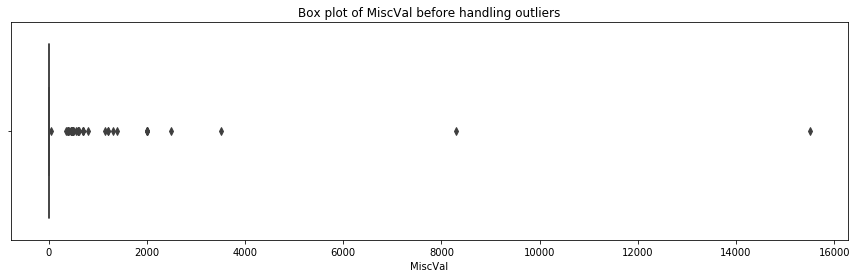

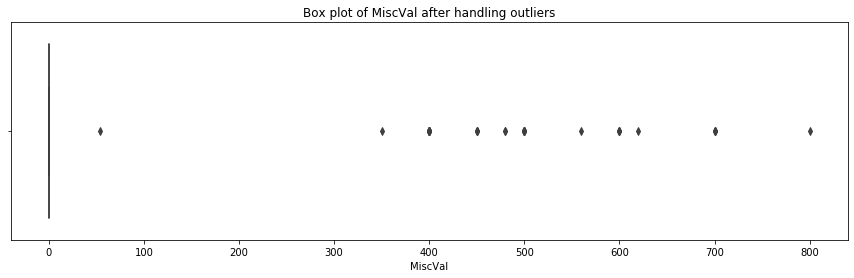

In [29]:
# Outlier analysis of MiscVal

plt1 = plot_box_plot('MiscVal')
plt1.title('Box plot of MiscVal before handling outliers')
plt1.show()

# Selecting values from 0.1 to 0.99 quantile range


feature = 'MiscVal'
lower_limit = np.quantile(raw_df[feature], 0.01)
upper_limit = np.quantile(raw_df[feature], 0.99)
raw_df = raw_df[(raw_df[feature] <= upper_limit) & (raw_df[feature] >= lower_limit)]

# Plot after handling outliers

plt1 = plot_box_plot('MiscVal')
plt1.title('Box plot of MiscVal after handling outliers')
plt1.show()

In [31]:
raw_df.shape

(1264, 79)

In [32]:
raw_df.describe()

Id  LotFrontage       LotArea   MasVnrArea   BsmtFinSF1  \
count  1264.000000  1264.000000   1264.000000  1264.000000  1264.000000   
mean    727.609177    59.289557  10335.473892    91.771361   436.676424   
std     422.667933    31.709914   3607.327800   150.699401   429.382136   
min       1.000000     0.000000   5000.000000     0.000000     0.000000   
25%     360.750000    50.000000   8175.000000     0.000000     0.000000   
50%     731.500000    65.000000   9624.000000     0.000000   384.000000   
75%    1094.250000    80.000000  11643.500000   157.000000   724.000000   
max    1460.000000   134.000000  36500.000000   772.000000  2188.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1264.000000  1264.000000  1264.000000  1264.000000  1264.000000   
mean     47.595728   576.638449  1060.910601  1173.753165   337.114715   
std     163.950392   442.834709   410.509043   358.569001   432.202837   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   243.500000   816.000000   902.000000     0.000000   
50%       0.000000   490.000000  1003.500000  1096.500000     0.000000   
75%       0.000000   813.250000  1293.750000  1392.000000   731.000000   
max    1474.000000  2153.000000  3206.000000  3228.000000  1818.000000   

         GrLivArea   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1264.000000  1264.000000  1264.000000  1264.000000    1264.000000   
mean   1516.739715   477.651899    93.693829    46.496835      23.332278   
std     487.220325   213.552986   122.906058    64.290365      61.903588   
min     334.000000     0.000000     0.000000     0.000000       0.000000   
25%    1134.750000   326.750000     0.000000     0.000000       0.000000   
50%    1479.000000   483.500000     0.000000    26.000000       0.000000   
75%    1792.000000   577.000000   169.250000    69.000000       0.000000   
max    3608.000000  1390.000000   736.000000   523.000000     386.000000   

         3SsnPorch  ScreenPorch     PoolArea      MiscVal      SalePrice  
count  1264.000000  1264.000000  1264.000000  1264.000000    1264.000000  
mean      3.938291    14.973101     1.552215    14.433544  180792.491297  
std      31.477061    54.453501    31.999586    86.182752   74980.352392  
min       0.000000     0.000000     0.000000     0.000000   34900.000000  
25%       0.000000     0.000000     0.000000     0.000000  130000.000000  
50%       0.000000     0.000000     0.000000     0.000000  164250.000000  
75%       0.000000     0.000000     0.000000     0.000000  214925.000000  
max     508.000000   410.000000   738.000000   800.000000  611657.000000

## Checking the correlation between numeric variables

In [33]:
raw_df.corr()

Id  LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  \
Id             1.000000    -0.033347  0.039579   -0.035734   -0.014018   
LotFrontage   -0.033347     1.000000  0.005347    0.106422   -0.015941   
LotArea        0.039579     0.005347  1.000000    0.174820    0.168983   
MasVnrArea    -0.035734     0.106422  0.174820    1.000000    0.238624   
BsmtFinSF1    -0.014018    -0.015941  0.168983    0.238624    1.000000   
BsmtFinSF2     0.002089    -0.040512  0.049615   -0.060909   -0.056143   
BsmtUnfSF     -0.004776     0.172725  0.065612    0.140293   -0.526465   
TotalBsmtSF   -0.018980     0.153472  0.267346    0.376609    0.455631   
1stFlrSF       0.012609     0.130747  0.342253    0.375577    0.376249   
2ndFlrSF      -0.002635     0.005190  0.099760    0.111292   -0.196806   
GrLivArea      0.001667     0.102545  0.339070    0.367785    0.094667   
GarageArea     0.022744     0.160794  0.296883    0.395558    0.248268   
WoodDeckSF    -0.022474    -0.037628  0.171053    0.164147    0.171023   
OpenPorchSF   -0.009368     0.045454  0.156810    0.158784    0.065531   
EnclosedPorch  0.007526    -0.009557 -0.058170   -0.111447   -0.124954   
3SsnPorch     -0.049194     0.021059  0.067094    0.034129    0.032260   
ScreenPorch   -0.016004     0.010866  0.112562    0.077840    0.053209   
PoolArea       0.048200    -0.017171  0.044684   -0.019030   -0.007287   
MiscVal       -0.067615    -0.029970 -0.007558   -0.042557   -0.024666   
SalePrice     -0.020687     0.160048  0.332337    0.488880    0.383327   

               BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
Id               0.002089  -0.004776    -0.018980  0.012609 -0.002635   
LotFrontage     -0.040512   0.172725     0.153472  0.130747  0.005190   
LotArea          0.049615   0.065612     0.267346  0.342253  0.099760   
MasVnrArea      -0.060909   0.140293     0.376609  0.375577  0.111292   
BsmtFinSF1      -0.056143  -0.526465     0.455631  0.376249 -0.196806   
BsmtFinSF2       1.000000  -0.211557     0.112442  0.098417 -0.109571   
BsmtUnfSF       -0.211557   1.000000     0.443584  0.325288  0.004677   
TotalBsmtSF      0.112442   0.443584     1.000000  0.783756 -0.244569   
1stFlrSF         0.098417   0.325288     0.783756  1.000000 -0.262753   
2ndFlrSF        -0.109571   0.004677    -0.244569 -0.262753  1.000000   
GrLivArea       -0.025595   0.246394     0.354593  0.500042  0.698507   
GarageArea      -0.013920   0.180782     0.449141  0.450750  0.126931   
WoodDeckSF       0.075846  -0.005047     0.203733  0.198610  0.091982   
OpenPorchSF      0.023940   0.127097     0.215211  0.188282  0.218878   
EnclosedPorch    0.036290  -0.000053    -0.116263 -0.085531  0.052474   
3SsnPorch       -0.032552   0.019634     0.041923  0.061196 -0.023608   
ScreenPorch      0.093339  -0.015306     0.076421  0.077776  0.025570   
PoolArea         0.022775  -0.016000    -0.015786  0.024265 -0.011417   
MiscVal         -0.027352  -0.044553    -0.084785 -0.074518 -0.038572   
SalePrice       -0.020954   0.215359     0.624899  0.601985  0.297917   

               GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
Id              0.001667    0.022744   -0.022474    -0.009368       0.007526   
LotFrontage     0.102545    0.160794   -0.037628     0.045454      -0.009557   
LotArea         0.339070    0.296883    0.171053     0.156810      -0.058170   
MasVnrArea      0.367785    0.395558    0.164147     0.158784      -0.111447   
BsmtFinSF1      0.094667    0.248268    0.171023     0.065531      -0.124954   
BsmtFinSF2     -0.025595   -0.013920    0.075846     0.023940       0.036290   
BsmtUnfSF       0.246394    0.180782   -0.005047     0.127097      -0.000053   
TotalBsmtSF     0.354593    0.449141    0.203733     0.215211      -0.116263   
1stFlrSF        0.500042    0.450750    0.198610     0.188282      -0.085531   
2ndFlrSF        0.698507    0.126931    0.091982     0.218878       0.052474   
GrLivArea       1.000000    0.437011    0.225437    

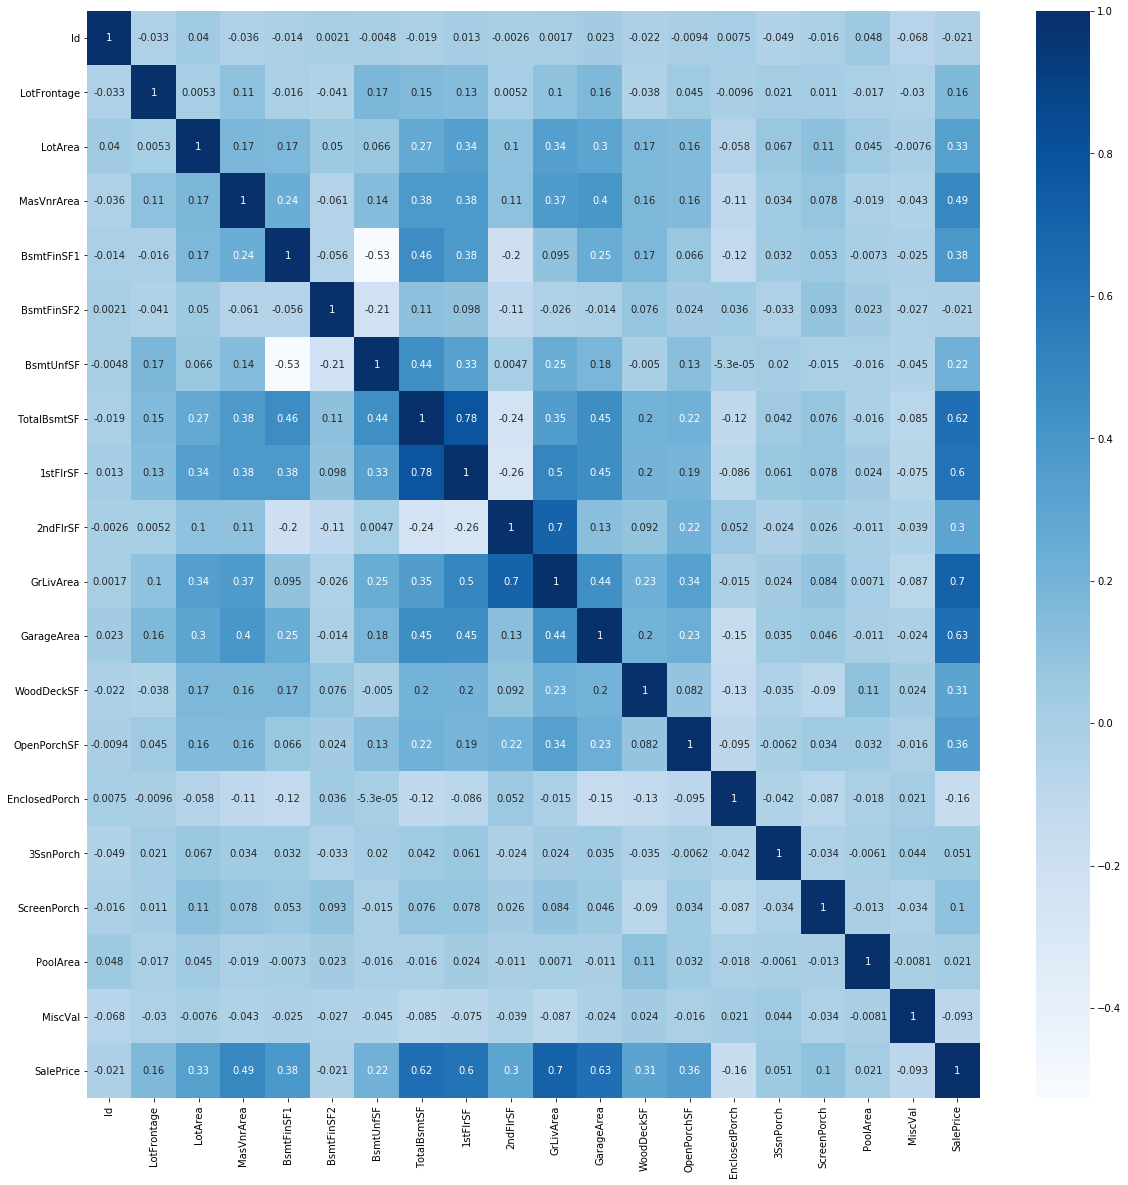

In [34]:
## Heat map showing relation between numeric variables

plt.figure(figsize= (20,20))
sns.heatmap(data= raw_df.corr(), annot= True, cmap = 'Blues')
plt.show()

# One Hot Encoding

In [35]:
year_related_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']
raw_df[year_related_cols] =  raw_df[year_related_cols].astype('float')

In [36]:
cat_cols = raw_df.select_dtypes('object').columns

In [37]:
cat_col_dummies = pd.get_dummies(raw_df[cat_cols], drop_first= True)
cat_col_dummies.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0  ...               0               0             0             0   
1  ...               0               0             0             0   
2  ...               0               0             0             0   
3  ...               0               0             0             0   
4  ...               0               0             0             0   

   SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0            1                      0                     0   
1            1                      0                     0   
2            1                      0                     0   
3            1                      0                     0   
4            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 295 columns]

In [38]:
numeric_df = raw_df.drop(cat_cols, axis = 1)
numeric_df.head()

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450       18.0          18.0       196.0         706   
1   2         80.0     9600       45.0          45.0         0.0         978   
2   3         68.0    11250       20.0          19.0       162.0         486   
3   4         60.0     9550      106.0          51.0         0.0         216   
4   5         84.0    14260       21.0          21.0       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  WoodDeckSF  OpenPorchSF  \
0           0        150          856  ...           0           61   
1           0        284         1262  ...         298            0   
2           0        434          920  ...           0           42   
3           0        540          756  ...           0           35   
4           0        490         1145  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0     2.0    13.0   
1              0          0            0         0        0     5.0    14.0   
2              0          0            0         0        0     9.0    13.0   
3            272          0            0         0        0     2.0    15.0   
4              0          0            0         0        0    12.0    13.0   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 25 columns]

In [39]:
# Concat dummies dataframe and numeric dataframe

final_df = pd.concat([numeric_df,cat_col_dummies], axis = 1)
final_df.head()

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450       18.0          18.0       196.0         706   
1   2         80.0     9600       45.0          45.0         0.0         978   
2   3         68.0    11250       20.0          19.0       162.0         486   
3   4         60.0     9550      106.0          51.0         0.0         216   
4   5         84.0    14260       21.0          21.0       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLI  SaleType_ConLw  \
0           0        150          856  ...               0               0   
1           0        284         1262  ...               0               0   
2           0        434          920  ...               0               0   
3           0        540          756  ...               0               0   
4           0        490         1145  ...               0               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      0   
4             0             0            1                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 320 columns]

In [40]:
final_df.shape

(1264, 320)

In [41]:
# Interpolating null values
final_df = final_df.fillna(final_df.interpolate())

In [42]:
np.array(final_df.isnull().sum())

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Model Creation

In [43]:
y = final_df['SalePrice']
X = final_df.drop('SalePrice', axis = 1)

### Splitting Data to train test split

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### Scaling the data

In [45]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

Id  LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
1030  0.714244    -1.919961 -0.887604   1.823176     -0.524196   -0.633247   
954   0.533226    -0.802407 -0.250426  -0.138283      0.433220    0.999043   
855   0.297426    -1.919961 -0.938458   0.293903     -1.242259   -0.633247   
1167  1.040553    -0.068014  0.148704  -0.969409     -0.763551   -0.633247   
161  -1.355556     1.592352  0.928272  -1.069145     -0.955034    3.702116   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLI  \
1030   -1.038614   -0.305395   0.261268    -0.904583  ...               0   
954     1.173567   -0.305395  -1.273770    -0.287270  ...               0   
855     0.504060   -0.305395  -0.421220    -0.060843  ...               0   
1167    0.801359   -0.305395  -0.886654    -0.253902  ...               0   
161     1.339773   -0.305395  -0.029629     1.207152  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1030               0             0             0            1   
954                0             0             0            1   
855                0             0             0            1   
1167               0             0             0            1   
161                0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1030                      0                     0                     0   
954                       1                     0                     0   
855                       0                     0                     0   
1167                      0                     0                     0   
161                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
1030                     1                      0  
954                      0                      0  
855                      1                      0  
1167                     1                      0  
161                      1                      0  

[5 rows x 319 columns]

# Model Building

## Ridge Regression

In [46]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [51]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [52]:
#checking the value of optimum number of parameters
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 7.0}
0.9072110931463694


In [53]:
cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.018032      0.001090         0.004115        0.000773      0.0001   
1       0.018153      0.001760         0.003657        0.000841       0.001   
2       0.014967      0.001086         0.003393        0.000507        0.01   
3       0.016363      0.001604         0.003789        0.000993        0.05   
4       0.017868      0.001667         0.004400        0.000503         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.878953           0.832707           0.891958   
1   {'alpha': 0.001}           0.879234           0.833195           0.892050   
2    {'alpha': 0.01}           0.881672           0.837335           0.892808   
3    {'alpha': 0.05}           0.888364           0.847979           0.894804   
4     {'alpha': 0.1}           0.892966           0.854862           0.896255   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.859179  ...         0.866669        0.020075               26   
1           0.859655  ...         0.867069        0.019958               25   
2           0.863639  ...         0.870188        0.018941               24   
3           0.873541  ...         0.877838        0.016450               23   
4           0.879886  ...         0.882821        0.015015               22   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.957110            0.962732            0.957818   
1            0.957110            0.962731            0.957817   
2            0.957098            0.962719            0.957800   
3            0.956950            0.962570            0.957613   
4            0.956701            0.962321            0.957328   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.960050            0.957780          0.959098         0.002071  
1            0.960049            0.957779          0.959097         0.002071  
2            0.960028            0.957753          0.959080         0.002072  
3            0.959804            0.957480          0.958883         0.002086  
4            0.959484            0.957094          0.958585         0.002103  

[5 rows x 21 columns]

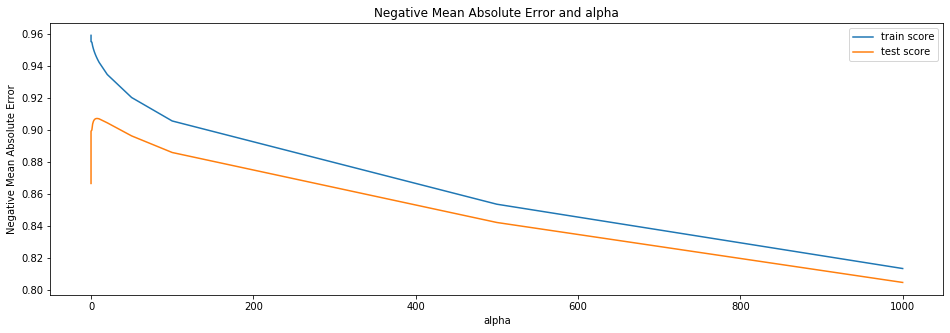

In [54]:
# plotting mean train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [63]:
# We got the optimum alpha value as 4. So using that and buildig the final model
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-4.05687345e+02, -1.07579026e+02,  1.80536393e+03, -1.29400732e+04,
       -3.03732964e+03,  2.22490186e+03,  8.47863557e+03,  1.65426467e+03,
        5.02801658e+02,  9.84742384e+03,  7.99082968e+03,  1.41588538e+04,
        1.38978075e+04, -9.03341570e+02,  1.12112315e+03,  1.34519120e+03,
        9.27407611e+02,  1.82125479e+03,  1.36446129e+03,  2.66115650e+03,
        9.10130128e+02, -6.36500778e+02,  7.93355996e+01,  3.60754702e+02,
        2.63261696e+03,  1.16270969e+03,  2.72307907e+03,  2.57318953e+01,
        3.29198788e+03,  2.26600207e+03,  2.08726357e+03, -9.56642190e+02,
       -3.32401822e+03, -5.62492494e+03, -1.69418288e+03, -5.24496942e+03,
       -1.12524358e+03,  1.41166970e+04,  1.36062264e+03,  7.22043853e+03,
        6.97025374e+03,  4.82506076e+03, -1.31598659e+02, -1.38136522e+03,
        7.47787611e+03, -3.25889254e+03,  2.76406285e+02,  5.46967628e+03,
       -1.03844231e+04, -3.51766878e+03, -1.77241642e+03,  4.13761852e+03,
       -3.87708105e+03, -

In [64]:
#Calculate R-squared value of test and train data
from sklearn import metrics
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9460012208241114


### Scaling test data

In [68]:
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test.head()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
1250  1.238244   -0.842696     1.049540  0.233368     0.677228    -0.507950   
586  -0.343284   -0.553060    -0.163804 -0.012102    -0.051968     1.309976   
111  -1.474647    0.895118    -1.919961 -0.703983     0.677228    -0.507950   
491  -0.569556    0.026211     0.602518 -0.225686    -0.051968     1.309976   
722  -0.019356   -0.842696     0.315147 -0.602276    -1.510359     1.309976   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  \
1250   0.094433      0.768316   -0.633247    1.454479  ...               0   
586    1.756686     -0.763551   -0.633247   -0.547018  ...               0   
111   -0.969409     -0.763551   -0.633247   -0.453381  ...               0   
491    0.992049      1.629991   -0.633247   -0.095218  ...               0   
722    0.027942      0.672574   -0.633247   -0.591496  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1250               0             0             0            1   
586                0             0             0            1   
111                0             0             0            1   
491                0             0             0            1   
722                0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1250                      0                     0                     0   
586                       0                     0                     0   
111                       0                     0                     0   
491                       0                     0                     0   
722                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
1250                     1                      0  
586                      1                      0  
111                      1                      0  
491                      1                      0  
722                      1                      0  

[5 rows x 244 columns]

In [69]:
#lets predict the R-squared value of test and train data
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9046225237621577


## Lasso Regression

In [70]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   41.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [71]:
cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.255400      0.028165         0.002983        0.000626      0.0001   
1       0.270493      0.057928         0.003209        0.001152       0.001   
2       0.244520      0.041737         0.002302        0.000335        0.01   
3       0.219117      0.023613         0.002513        0.000451        0.05   
4       0.201417      0.013430         0.002394        0.000477         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -17480.902243      -19714.808563      -16907.065650   
1   {'alpha': 0.001}      -17480.828680      -19713.985140      -16906.933261   
2    {'alpha': 0.01}      -17480.068808      -19705.751019      -16905.603036   
3    {'alpha': 0.05}      -17476.459830      -19669.163311      -16898.654208   
4     {'alpha': 0.1}      -17471.925313      -19623.608784      -16890.204522   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -18221.358031  ...    -17810.754119     1085.199536               28   
1      -18221.125750  ...    -17810.491927     1084.929357               27   
2      -18196.971422  ...    -17803.498697     1080.605615               26   
3      -18185.421396  ...    -17791.394673     1068.624639               25   
4      -18175.905170  ...    -17777.259582     1054.134491               24   

   split0_train_score  split1_train_score  split2_train_score  \
0       -11490.298014       -11135.829283       -11135.532661   
1       -11490.282777       -11135.844569       -11135.540723   
2       -11490.271161       -11136.082124       -11135.680401   
3       -11490.246471       -11137.069257       -11136.323314   
4       -11490.334138       -11138.383519       -11137.095716   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -11094.696132       -11427.289582     -11256.729134       166.856430  
1       -11094.714537       -11427.280121     -11256.732545       166.843269  
2       -11094.956712       -11427.365036     -11256.871087       166.755631  
3       -11095.813505       -11427.758060     -11257.442121       166.426312  
4       -11096.911461       -11428.459476     -11258.236862       166.078758  

[5 rows x 21 columns]

In [72]:
#checking the value of optimum number of parameters
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 100}
-15772.195785063435


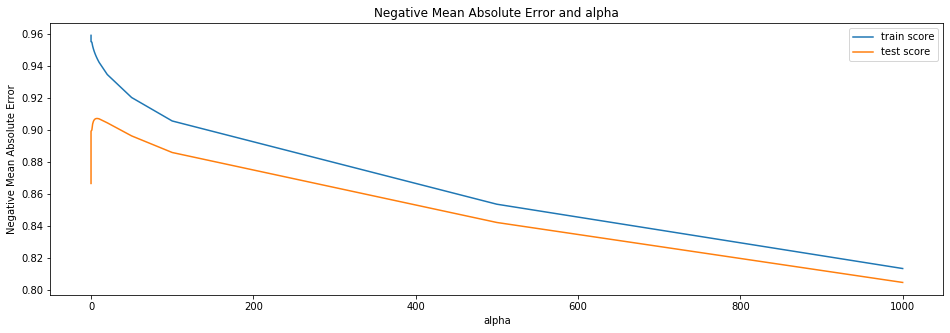

In [69]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [74]:
# We got the optimum alpha value as 100. So using that and buildig the final model
alpha = 100
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-5.70644395e+02, -2.37201901e+03, -1.55343667e+02,  2.37023394e+03,
        1.15632604e+04,  7.04105019e+03, -1.33900434e+04, -2.33992737e+03,
        2.60000719e+03,  5.83571096e+03,  2.62764447e+02, -0.00000000e+00,
        1.10826172e+04,  0.00000000e+00,  4.09985326e+03, -1.37031755e+03,
        2.28400277e+04,  2.39868183e+03, -0.00000000e+00,  3.19713434e+02,
       -0.00000000e+00, -3.96348856e+03, -4.97536018e+03,  4.50630067e+03,
        2.21101344e+03, -1.41988430e+03,  4.02279926e+03,  7.23930181e+02,
        1.41116454e+03,  9.41931643e+02,  1.39755379e+03,  6.38789097e+02,
        2.46239852e+03,  7.72158328e+02, -5.08883419e+01, -0.00000000e+00,
        6.63543697e+02,  9.16130484e+03, -0.00000000e+00,  1.26553865e+03,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  7.35273807e+03,
       -4.87790824e+03, -0.00000000e+00, -0.00000000e+00,  2.15031588e+03,
       -0.00000000e+00, -

In [75]:
#Calculate R-squared value of test and train data
from sklearn import metrics
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9315960548681764


In [76]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9021931303821572


### Comparing the R2 Scores of Ridge and Lasso, Ridge is having better score. So, taking Ridge regression model as the final model

## Model Prediction and RMSE Score

In [77]:
# Presiction of test and train data using Ridge model
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9046225237621577


- Using Ridge regression model, we got r2 score as 0.95 in train data and 0.91 in test data.